<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Прямое-кодирование" data-toc-modified-id="Прямое-кодирование-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Прямое кодирование</a></span></li><li><span><a href="#Деление-на-выборки-и-их-масштабирование" data-toc-modified-id="Деление-на-выборки-и-их-масштабирование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Деление на выборки и их масштабирование</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-модели-без-учета-дисбаланса" data-toc-modified-id="Обучение-модели-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели без учета дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [24]:
!pip install sweetviz

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
df = pd.read_csv('/datasets/Churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [27]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           9091 non-null   float64

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


Ради эксперемента используем библиотеку sveet analyze для быстрого исследования данных.

In [29]:
report = sv.analyze([df, 'Churn clients'])

                                             |          | [  0%]   00:00 -> (? left)

In [30]:
report.show_html('common analysis.html')

Report common analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
# Удалим ненужные столбцы 

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

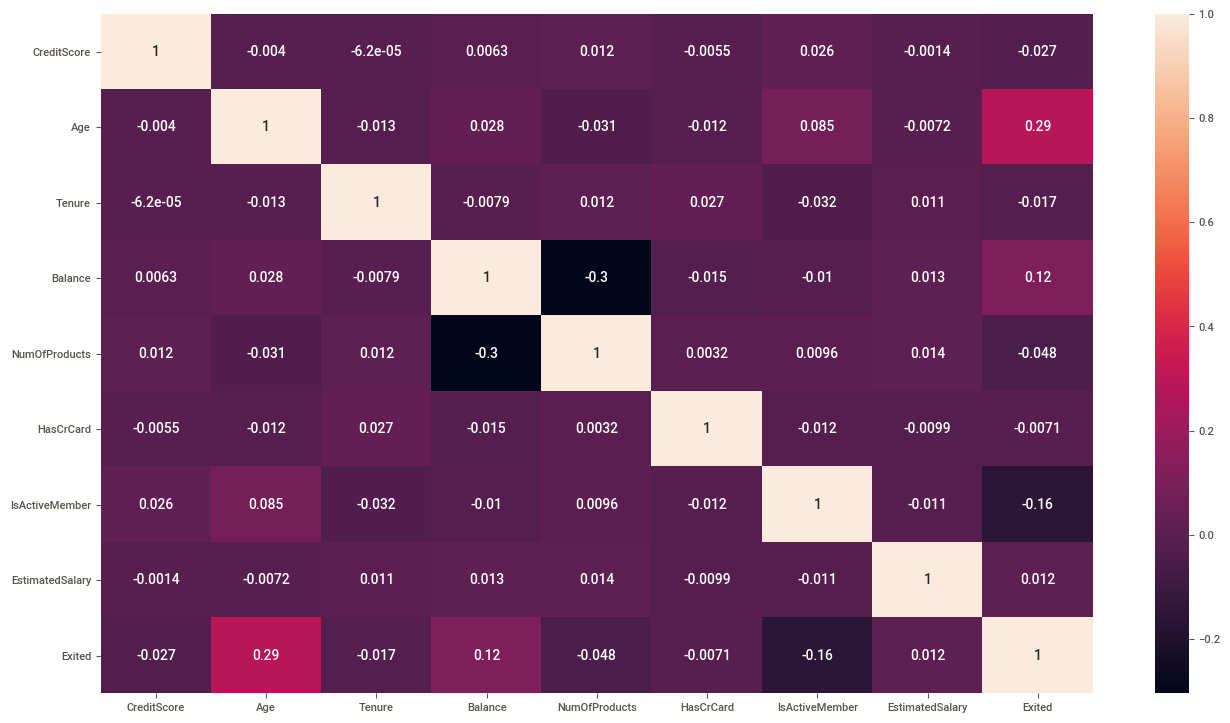

In [32]:
# посмотрим на корелляцию данных между собой

plt.figure(figsize = (16,9))
data = sns.heatmap(df.corr(), annot=True)

In [33]:
# Сразу поменяем тип данных в колонке Tenure

df['Tenure'] = df['Tenure'].astype('Int64')

print(df['Tenure'].dtype)

Int64


In [34]:
# Посмотрим кол-во пропусков

df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [35]:
df.dropna(subset = ['Tenure'], inplace=True)

Т.к. `Tenure` никак не коррелирует с каким либо другим пунктом, а заменять на константу будет не слишком хорошо (необъективная выборка будет), то удалю значения.

Посмотрим на наличие дубликатов.

In [36]:
df.duplicated().sum()

0

### Прямое кодирование

In [37]:
# Кодируем наши признаки методом OneHotEncoding

df_ohe = pd.get_dummies(df, drop_first=True)

# Ради любопытства посмотрю, как много столбцов появилось

print(df.shape)
print(df_ohe.shape)
print(df_ohe.columns)

(9091, 11)

(9091, 12)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',

       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',

       'Geography_Spain', 'Gender_Male'],

      dtype='object')


### Деление на выборки и их масштабирование

In [38]:
# Создадим объект для StandardScaler
scaler = StandardScaler()

# Поделим датасет на признаки и целевой признак
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

# Поделим на обучающую, валидационную и тестовую в соотношении 3:1:1
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                           test_size=.4,
                                                                           random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(features_test,
                                                                           target_test,
                                                                           test_size=.5,
                                                                           random_state=12345)

# Создадим список с численными признаками
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Настраиваем масштабирование
scaler.fit(features_train[numeric])

# Преобразовываем обучающую и валидационную выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#target_train = target_train.to_numpy()

print(features_train)

pd.options.mode.chained_assignment = None

      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \

9344     0.809075 -1.039327       2  0.554904      -0.908179          1   

3796    -1.152518 -1.227561       7  0.480609      -0.908179          0   

7462    -0.398853  0.090079       9 -1.237830      -0.908179          1   

1508    -0.749875 -0.286389       6 -1.237830       0.809300          1   

4478    -1.028628 -0.756975       4 -1.237830       0.809300          0   

...           ...       ...     ...       ...            ...        ...   

4938     1.283988 -0.474624      10  0.813031      -0.908179          0   

4529     0.158652  0.466548       8  1.071609      -0.908179          1   

3866    -1.049276 -0.945210       6  0.449165      -0.908179          1   

2414    -0.956359  1.219485       9 -1.237830      -0.908179          1   

5056     1.222043 -1.509912       2  1.015938      -0.908179          0   



      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \

9344    

## Исследование задачи

### Исследование баланса классов

In [39]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)
print('Соотношение отрицательных классов к положительным:', features_zeros['Age'].count() / features_ones['Age'].count())

(4328, 11)

(1126, 11)

(4328,)

(1126,)

Соотношение отрицательных классов к положительным: 3.8436944937833037


#### Вывод

Отрицательных классов гораздо больше положительных, следует использовать апсемплинг.

### Обучение модели без учета дисбаланса

In [40]:
# Посмотрим на модель логистической регрессии

model_logreg = LogisticRegression()
model_logreg.fit(features_train, target_train)

predictions_valid = model_logreg.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid))

F1: 0.32119914346895073


In [41]:
# Теперь для начала обучим и посмотрим на модели без баланса классов

random_parameters = {'n_estimators': range(1, 101, 5),
                    'max_depth': range(1, 31, 1),
                    'max_features': ['auto', 'sqrt'],
                    'bootstrap': [True, False]}

model_rfc = RandomForestClassifier(random_state=12345)

model__rfc_random = RandomizedSearchCV(estimator=model_rfc,
                               param_distributions=random_parameters,
                               random_state=12345,
                                  n_jobs=-1,
                                      scoring='f1')

model__rfc_random.fit(features_train, target_train)

print("F1 лучшей модели: ", model__rfc_random.best_score_)
print("Лучшие параметры: ", model__rfc_random.best_params_)

F1 лучшей модели:  0.5738124462983766

Лучшие параметры:  {'n_estimators': 31, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': True}


In [42]:
# То же самое с решающим деревом проделаем.

random_parameters2 = {'max_depth': range(1, 20, 1)}

dtc = DecisionTreeClassifier(random_state=12345)

model_dtc_random = RandomizedSearchCV(random_state=12345,
                                       estimator=dtc,
                                       param_distributions=random_parameters2,
                                       n_jobs=-1,
                                     scoring='f1')

model_dtc_random.fit(features_train, target_train)

print("F1 лучшей модели: ", model_dtc_random.best_score_)
print("Лучшие параметры: ", model_dtc_random.best_params_)

F1 лучшей модели:  0.5439773157130556

Лучшие параметры:  {'max_depth': 9}


Т.к. валидационная оценка лучше у модели со случайным лесом, то посчитаем F1_score для этой модели.

In [43]:
model_rfc2 = RandomForestClassifier(n_estimators=71,
                                   max_features='auto',
                                   max_depth=12,
                                   bootstrap=True,
                                   random_state=12345)

model_rfc2.fit(features_train, target_train)

predictions_valid = model_rfc2.predict(features_valid)

probabilities_valid = model_rfc2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('F1_score:', f1_score(target_valid, predictions_valid))

print('Значение AUC-ROC:', auc_roc)

F1_score: 0.5745454545454546

Значение AUC-ROC: 0.8550637726387045


#### Вывод

Лучше всех на данном этапе справляется метод случайного леса. Но  Будем работать с ним.

## Борьба с дисбалансом

### Взвешивание классов

In [44]:
# Теперь с балансом классов

random_parameters = {'n_estimators': range(1, 101, 5),
                    'max_depth': range(1, 31, 1),
                    'max_features': ['auto', 'sqrt'],
                    'bootstrap': [True, False]}

rfc_balanced = RandomForestClassifier(random_state=12345, class_weight='balanced')

model__rfc_balanced = RandomizedSearchCV(estimator=rfc_balanced,
                               param_distributions=random_parameters,
                               random_state=12345,
                                  n_jobs=-1,
                                  n_iter = 100,
                                  cv = 3)

model__rfc_balanced.fit(features_train, target_train)

print("Валидационная оценка лучшей модели со сбалансированными классами:",
      model__rfc_balanced.best_score_)
print("Лучшие параметры со сбалансированными классами:",
      model__rfc_balanced.best_params_)

Валидационная оценка лучшей модели со сбалансированными классами: 0.8535020168683536

Лучшие параметры со сбалансированными классами: {'n_estimators': 91, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': True}


In [45]:
rfc_balanced = RandomForestClassifier(n_estimators = 121,
                               max_features='auto',
                               max_depth=19,
                               bootstrap=True,
                                random_state=12345,
)
rfc_balanced.fit(features_train, target_train)

predictions_valid = rfc_balanced.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid))

F1: 0.5811051693404635


Мера F1 повысилась, но еще недостаточно для того, чтобы перейти порог. Пора приступать к апсэмплингу.

### Upsampling

In [46]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(n_estimators=31,
                                   max_depth=10,
                                   random_state=12345
                              )

model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

probabilities_valid = model_rfc2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("F1 решающего дерева:", f1_score(target_valid, predicted_valid))
print('Значение AUC-ROC:', auc_roc)

F1 решающего дерева: 0.5895522388059702

Значение AUC-ROC: 0.8550637726387045


In [47]:
print(features_upsampled[target_upsampled == 0].shape, features_upsampled[target_upsampled == 1].shape)
print(features_upsampled.shape)
print(target_upsampled.shape)

(4328, 11) (4504, 11)

(8832, 11)

(8832,)


Берем в работу метод случайного леса с сэмплированными выборками и без взвешивания классов.

## Тестирование модели

In [48]:
model_balanced3 = RandomForestClassifier(n_estimators=71,
                                   max_features='auto',
                                   max_depth=12,
                                   bootstrap=True,
                                   random_state=12345)
model_balanced3.fit(features_upsampled, target_upsampled)

predicted_valid3 = model_balanced3.predict(features_valid)
f1_balanced3 = f1_score(target_valid, predicted_valid3)
print("F1:", f1_balanced3)

F1: 0.5994623655913979


In [49]:
probabilities_valid = model_balanced3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Значение AUC-ROC:', auc_roc)

Значение AUC-ROC: 0.8520478663530436


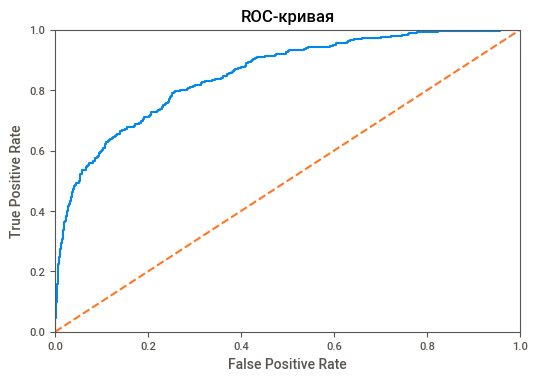

In [50]:
# Построим ROC-кривую

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

По данному графику можно сделать вывод, что модель угадывает не случайно, а как надо.

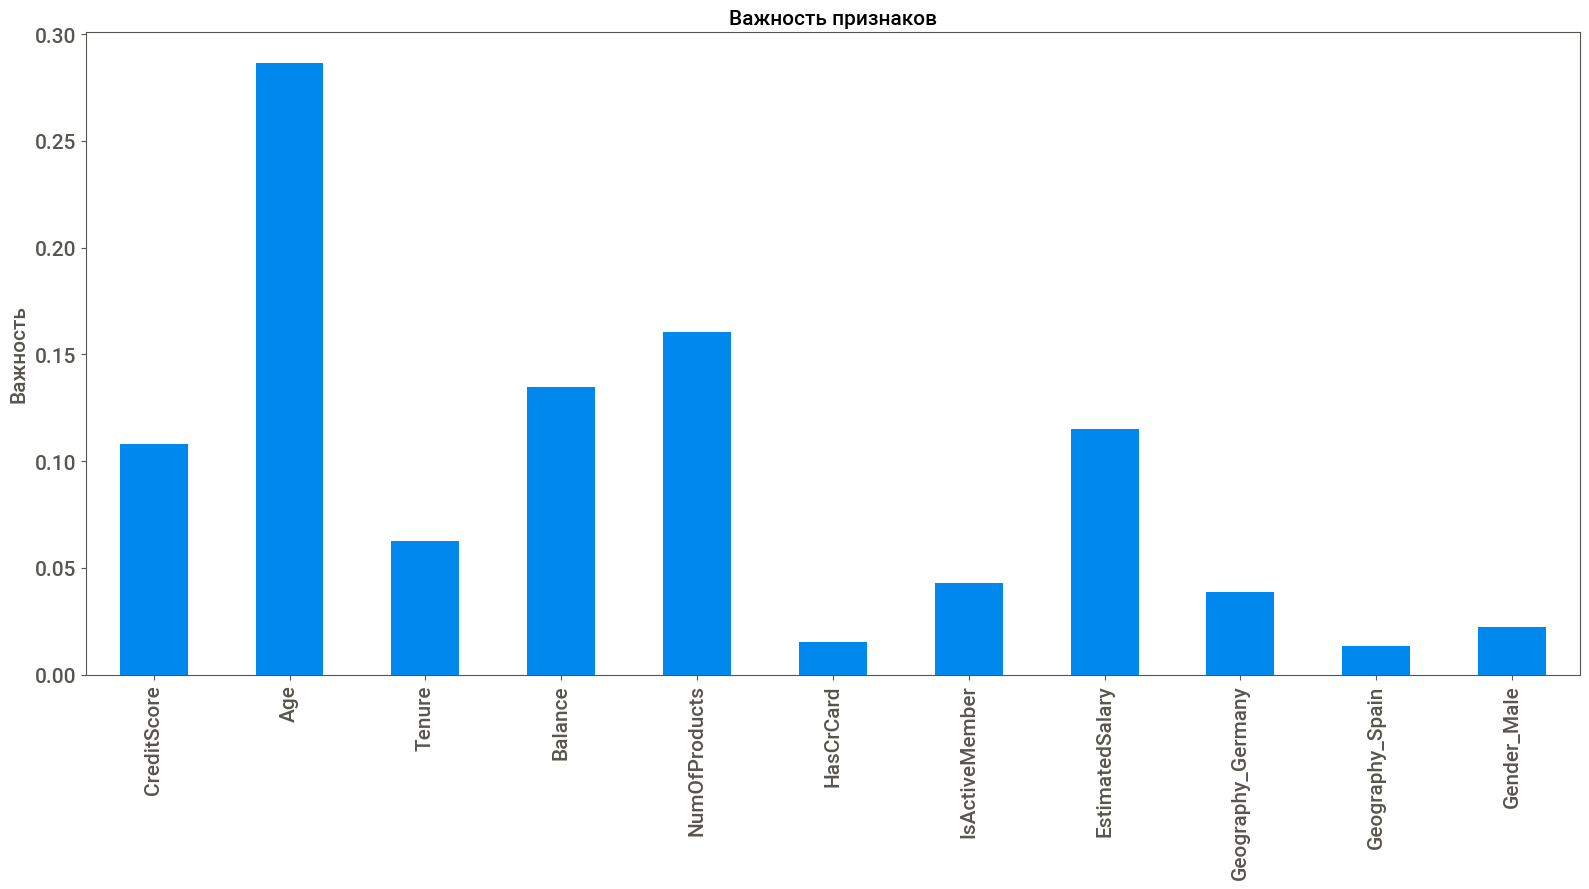

In [57]:
features_vazhnost = pd.Series(model_balanced3.feature_importances_,
                         features_upsampled.columns)

fig, ax = plt.subplots(figsize=(16, 9))

features_vazhnost.plot.bar(ax=ax, fontsize=15)
ax.set_title("Важность признаков", fontsize=15)
ax.set_ylabel('Важность', fontsize=15)
fig.tight_layout()

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*